# BME-W07-Logistics Regression (LR)

## Step 1: Identify problem and purpose.

### Medical topic

Diabetes is a chronic metabolic disorder characterized by high blood sugar levels due to inadequate insulin production or ineffective insulin utilization. There are three main types: Type 1, an autoimmune condition often diagnosed in childhood; Type 2, primarily linked to obesity, poor diet, and lack of exercise; and gestational diabetes, which occurs during pregnancy. Common symptoms include frequent urination, excessive thirst, unexplained weight loss, fatigue, and slow wound healing. Genetics, lifestyle factors, and hormonal changes contribute to its development. Globally, diabetes affects over 540 million people, with a rising prevalence among younger populations due to increasing obesity rates. Effective management includes lifestyle changes, medication, regular monitoring, and early intervention to prevent complications.

The goal of the exercise is to determine whether a person has diabetes.


## Dataset Description

The dataset consists of **15 features** that describe patient characteristics and health metrics relevant to diabetes diagnosis. Below is a detailed description of each feature:

1. **Patient Number:** A unique identifier for each patient. Not useful for analysis.  
2. **Cholesterol:** Total cholesterol level in the blood, measured in *mg/dL*. High levels can indicate cardiovascular risk.  
3. **Glucose:** Blood glucose level, measured in *mg/dL*. Elevated levels may indicate diabetes or prediabetes.  
4. **HDL Cholesterol (hdl_chol):** High-density lipoprotein cholesterol, measured in *mg/dL*. Often referred to as “good” cholesterol.  
5. **Cholesterol-HDL Ratio (chol_hdl_ratio):** The ratio of total cholesterol to HDL cholesterol. A higher ratio suggests a higher risk of heart disease.  
6. **Age:** The age of the patient in years.  
7. **Gender:** The biological sex of the patient, encoded as “male” or “female.”  
8. **Height:** The height of the patient in inches.  
9. **Weight:** The weight of the patient in pounds.  
10. **Body Mass Index (BMI):** A measure of body fat calculated as *weight (kg) / height² (m²)*. Used to categorize underweight, normal weight, overweight, or obesity.  
11. **Systolic Blood Pressure (systolic_bp):** The higher number in a blood pressure reading, indicating the pressure in arteries during heartbeats, measured in *mmHg*.  
12. **Diastolic Blood Pressure (diastolic_bp):** The lower number in a blood pressure reading, indicating pressure between heartbeats, measured in *mmHg*.  
13. **Waist:** The circumference of the waist, measured in inches. An indicator of central obesity.  
14. **Hip:** The circumference of the hip, measured in inches.  
15. **Waist-Hip Ratio (waist_hip_ratio):** The ratio of waist circumference to hip circumference. Higher ratios can indicate increased health risks.  
16. **Diabetes Status:** Indicates whether the patient has diabetes or not ("No diabetes"). This is the target variable for logistic regression.

This dataset provides a comprehensive view of patient health metrics related to cardiovascular and metabolic conditions, making it suitable for predicting diabetes through logistic regression.

## Step 2: Data loading
link dataset: [Data Link](https://drive.google.com/file/d/1Itf5rut7v0NI_F28NMta9nG62d0cWdpf/view)

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Load data and look at overall information:

In [40]:
df = pd.read_csv("data/data.csv")

# Display the number of rows and columns
print(df.shape)
print(df.head())
print(df.info())  # Display data type of each column
print(df.describe())  # Display statistical information of numerical columns
print(df.duplicated().sum())  # Check for duplicates
print(df.isnull().sum())  # Check for missing values


(390, 16)
   patient_number  cholesterol  glucose  hdl_chol chol_hdl_ratio  age  gender  \
0               1          193       77        49            3,9   19  female   
1               2          146       79        41            3,6   19  female   
2               3          217       75        54              4   20  female   
3               4          226       97        70            3,2   20  female   
4               5          164       91        67            2,4   20  female   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      61     119  22,5          118            70     32   38   
1      60     135  26,4          108            58     33   40   
2      67     187  29,3          110            72     40   45   
3      64     114  19,6          122            64     31   39   
4      70     141  20,2          122            86     32   39   

  waist_hip_ratio     diabetes  
0            0,84  No diabetes  
1            0,83  No diabetes  
2      

There are 5 rows and 16 columns, 0 duplicates, 0 missing values

Columns that are having inappropriate data:
- patient_number: This column is not useful for analysis
- gender: This column need label encoding
- chol_hdl_ratio, bmi, waist_hip_ratio: This column need to be converted from int to float
- diabetes; This column need label encoding

## Commonly encountered issue: Anonymization
Hospital IT personnel extracted relevant patient data from the hospital EMR (Microsoft SQL server) and de-identified data by removing patients’ names and address. Specific views, i.e., tables containing multiple variables relating to a given type of medical data, were created. However, the hospital identifiers (ID) were left in and so you need to remove it and create a new patient  ID specific to your study. The mapping between the new ID and the hospital ID should be kept by the hospital personal to ensure anonymity. Here we don't (and we shouldn't) have the key and we can simply drop the ID.

In [41]:
# Step 1: Drop the 'patient_number' column
df.drop(columns=["patient_number"], inplace=True)

We also treat inappropriate datas:

In [42]:
# Step 2: Label encoding for 'gender' and 'diabetes'
df["gender"] = df["gender"].map({"male": 0, "female": 1})
df["diabetes"] = df["diabetes"].map({"No diabetes": 0, "Diabetes": 1})

# Step 3: Convert specified columns to float
columns_to_float = ["chol_hdl_ratio", "bmi", "waist_hip_ratio"]
for col in columns_to_float:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

Let's see the original data one more time.

In [43]:
print(df.shape)
print(df.head())
print(df.info())  # Display data type of each column
print(df.describe())  # Display statistical information of numerical columns
print(df.duplicated().sum())  # Check for duplicates
print(df.isnull().sum())  # Check for missing values

(390, 15)
   cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  gender  height  \
0          193       77        49             3.9   19       1      61   
1          146       79        41             3.6   19       1      60   
2          217       75        54             4.0   20       1      67   
3          226       97        70             3.2   20       1      64   
4          164       91        67             2.4   20       1      70   

   weight   bmi  systolic_bp  diastolic_bp  waist  hip  waist_hip_ratio  \
0     119  22.5          118            70     32   38             0.84   
1     135  26.4          108            58     33   40             0.83   
2     187  29.3          110            72     40   45             0.89   
3     114  19.6          122            64     31   39             0.79   
4     141  20.2          122            86     32   39             0.82   

   diabetes  
0         0  
1         0  
2         0  
3         0  
4         0  
<class 'pa

## Step 3: Data preprocessing and exploration

We create a histogram for each numeric value and heatmap

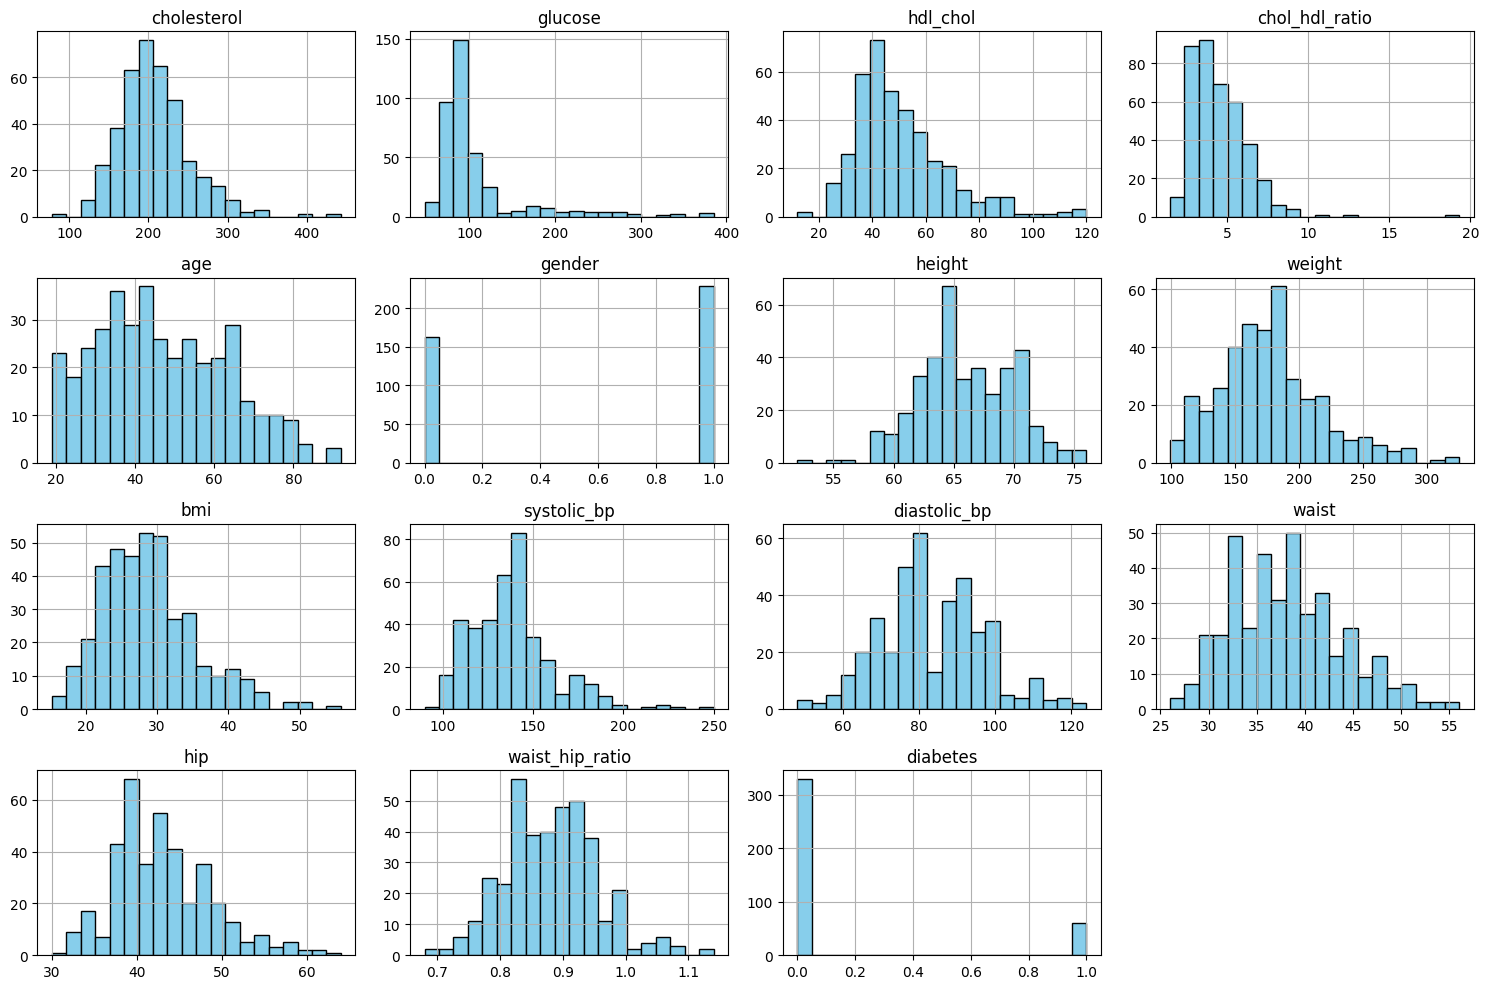

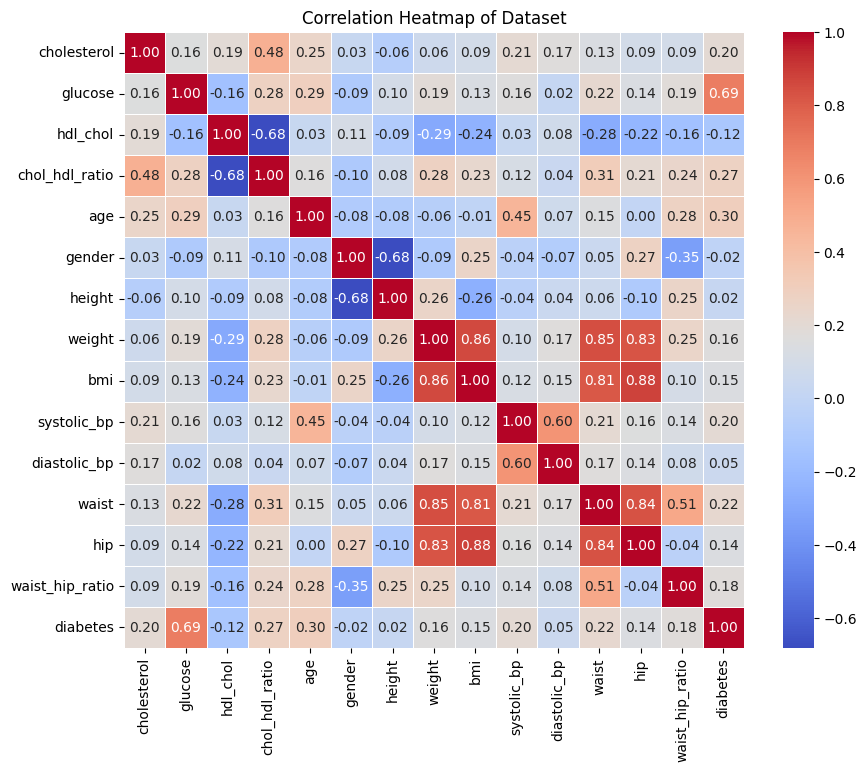

In [44]:
# Create a histogram for each numerical column
df.hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True
)
plt.title("Correlation Heatmap of Dataset")
plt.show()

Corellation shows that 'glucose', 'age', 'chol_hdl_ratio' and 'diabetes' are highly correlated
Let's select these features for further analysis

In [45]:
selected_features = [
    "glucose",
    "age",
    "chol_hdl_ratio",
    "diabetes",
]  # Assuming 'diabetes' is the target variable
df_filtered = df[selected_features]

# Choose model: Logistic Regression

# Save the filtered dataset
df_filtered.to_csv(
    "data/filtered_dataset.csv", index=False
)

print("Filtered dataset saved as 'filtered_dataset.csv")

Filtered dataset saved as 'filtered_dataset.csv


Let's see the data one more time:

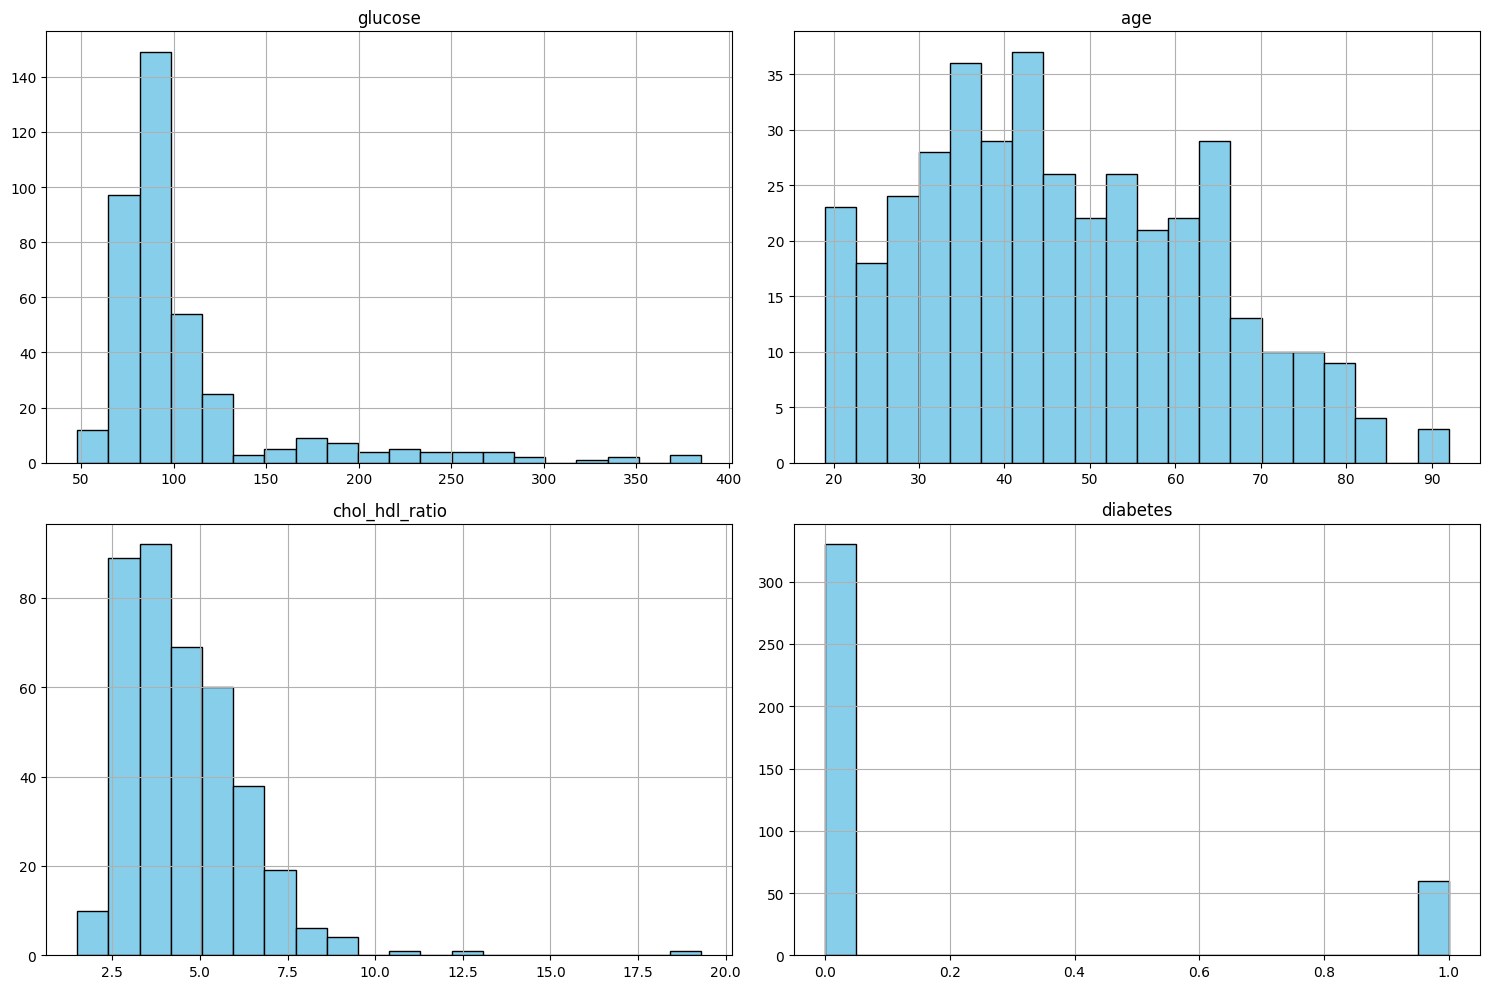

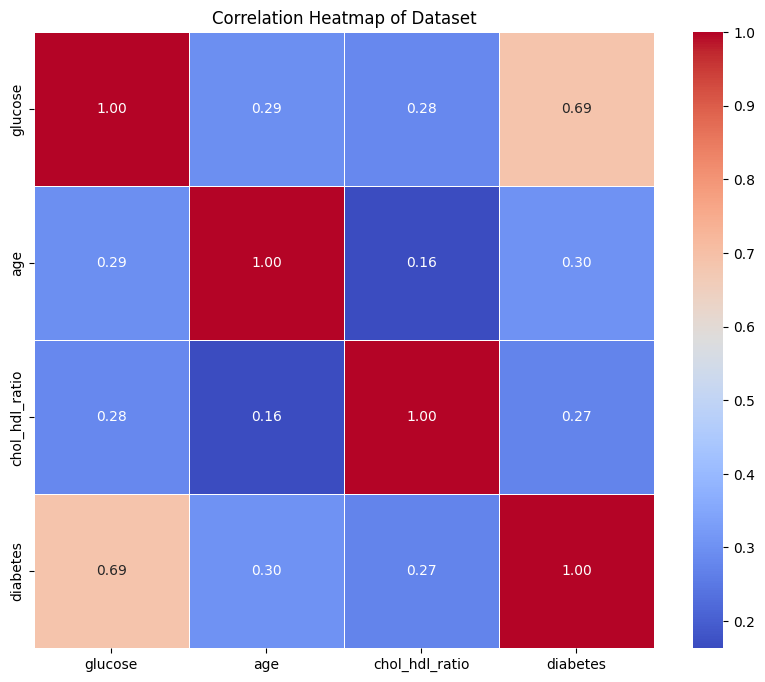

In [46]:
# Create a histogram for each numerical column
df_filtered.hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

corr_matrix = df_filtered.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True
)
plt.title("Correlation Heatmap of Dataset")
plt.show()

## Step 4: Model Selection

In [47]:
# Features (X) and target (y)
X = df_filtered[["glucose", "age", "chol_hdl_ratio"]]
y = df_filtered["diabetes"]

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

## Step 6: Evaluation 

Model Accuracy: 0.89744


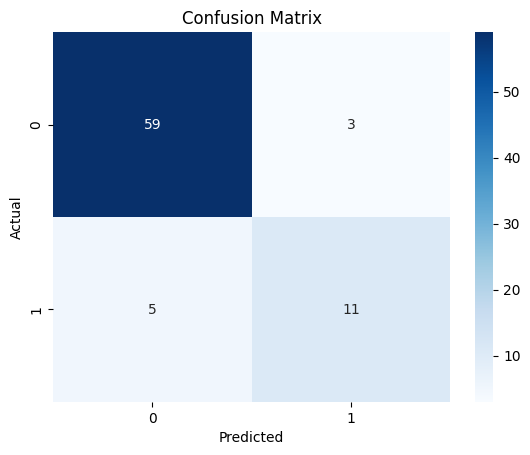

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        62
           1       0.79      0.69      0.73        16

    accuracy                           0.90        78
   macro avg       0.85      0.82      0.83        78
weighted avg       0.89      0.90      0.89        78



In [48]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.5f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Let's see other approaches:

1. More features? It may increase clarity, hence accuracy.


In [49]:
selected_features_1 = [
    "glucose",
    "age",
    "chol_hdl_ratio",
    "waist",
    "systolic_bp",
    "diastolic_bp",
    "diabetes",
]
df_filtered_1 = df[selected_features_1]

# Choose model: Logistic Regression

# Features (X) and target (y)
X = df_filtered_1[["glucose", "age", "chol_hdl_ratio", "waist", "systolic_bp", "diastolic_bp"]]
y = df_filtered_1["diabetes"]

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

Model Accuracy: 0.89744


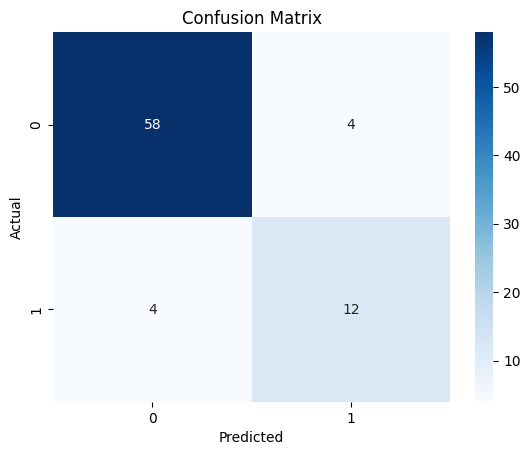

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        62
           1       0.75      0.75      0.75        16

    accuracy                           0.90        78
   macro avg       0.84      0.84      0.84        78
weighted avg       0.90      0.90      0.90        78



In [50]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.5f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

It seems like having more data reduces accuracy, although not much.

2. Reducing the number of data points by a half randomly?

In [51]:
df_half = df_filtered.sample(frac=0.5, random_state=42).reset_index(drop=True)

Model Accuracy: 0.92308


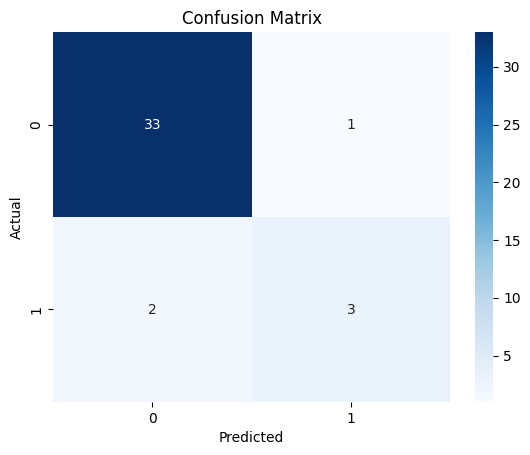

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.75      0.60      0.67         5

    accuracy                           0.92        39
   macro avg       0.85      0.79      0.81        39
weighted avg       0.92      0.92      0.92        39



In [52]:
# Features (X) and target (y)
X = df_half[["glucose", "age", "chol_hdl_ratio"]]
y = df_half["diabetes"]

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.5f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

So reducing learning sample size increases accuracy. It can be explained as lower noise, less overfitting.